<a href="https://colab.research.google.com/github/Karthik-Saladi5/MachineLearning/blob/main/RidgeAndLassoRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=fetch_california_housing()
dataset=pd.DataFrame(df.data)
dataset.columns=df.feature_names
X= dataset
y=df.target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**Ridge and Lasso Practical Implementation**

### Why we use Ridge Regression?

1.  To solve Overfitting Problem

2. we will tune hyperparameter which helps in removing Overfitting. in Ridge we use Lambda/Alpha as hyper Parameter.
3. we use gridSearchCV now in this notebook.

#### Important Parameters in Ridge Regression:

  * Lambda Function (We use alpha)

  * Slope square

  [Resource](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)



In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge_regressor=Ridge() #Intialization
ridge_regressor # By default alpha value is 1

Ridge()

In [ ]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,60,70,80,90]} # to check which value suits for the following problem statement.
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train) #internally cross validation

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridgecv.best_params_)

{'alpha': 1}


In [ ]:
print(ridgecv.best_score_)

-0.5268263170917393


In [ ]:
ridge_pred=ridgecv.predict(X_test)

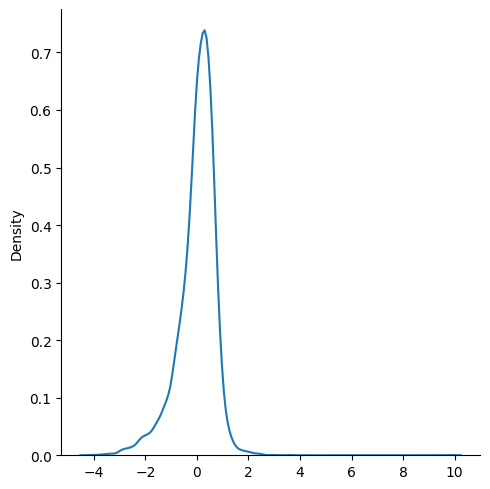

In [ ]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(ridge_pred,y_test)
score

0.34504619609013487

# Lasso Regression

In [19]:
from sklearn.linear_model import Lasso

In [20]:
lasso=Lasso()

In [22]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,60,70,80,90]} # to check which value suits for the following problem statement.
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train) #internally cross validation

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [25]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-0.9542641137462577


In [26]:
lasso_pred=lassocv.predict(X_test)

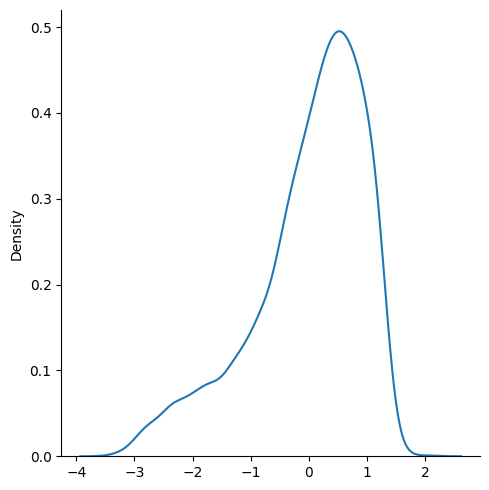

In [27]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')